In [74]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
#Baseball Reference web site
url = "https://www.baseball-reference.com/register/leader.cgi?type=bat&id=17edbc3b"
html = urlopen(url)
soup = BeautifulSoup(html)

# use findALL() to get the column headers
soup.findAll('tr', limit=2)
# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
# exclude the first column
headers = headers[1:]

# exclude the first header row
rows = soup.findAll('tr')[1:]
print(len(rows))
batting = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

batting_stats = pd.DataFrame(batting, columns = headers)


#change object to numeric
cols = batting_stats.columns.drop(['Name', 'Tm'])
batting_stats[cols] = batting_stats[cols].apply(pd.to_numeric, errors='coerce')

batting_stats.head()

100


,Name,Age,Tm,Lev,Aff,G,PA,AB,R,H,...,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
0,Yong-ho Cho,30,WIZ,NaN,NaN,5,9,9,2,6,...,0.667,0.667,0.778,1.444,7,0,0,0,0,0
1,Jose Miguel Fernandez,32,DOO,NaN,NaN,7,32,29,8,15,...,0.517,0.563,0.759,1.321,22,1,0,0,0,0
2,Hyun Soo Kim,32,LGK,NaN,NaN,7,32,31,7,15,...,0.484,0.500,0.774,1.274,24,0,0,0,0,0
3,Hee-Dong Kwon,29,NCD,NaN,NaN,5,16,13,4,6,...,0.462,0.563,0.769,1.332,10,0,0,0,0,0
4,Mel Rojas,30,WIZ,NaN,NaN,7,33,31,5,14,...,0.452,0.485,0.677,1.162,21,0,0,0,0,0


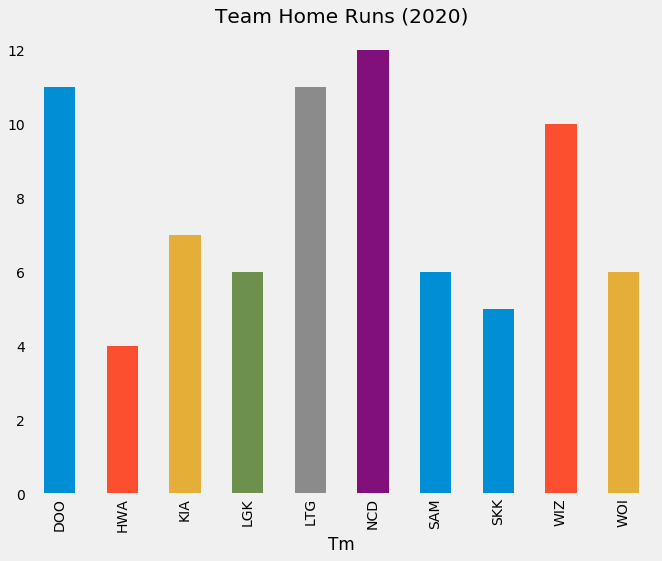

In [91]:
#team homerun
plt.style.use('fivethirtyeight')
batting_stats.groupby(['Tm'])["HR"].sum().plot(kind= 'bar' , secondary_y= 'UserDistribution' ,rot= 90,figsize=(10, 8), title="Team Home Runs (2020)")

In [2]:
#Stadium Location

In [66]:
# download wikipage
wikipage = "https://en.wikipedia.org/wiki/KBO_League"
result = pd.read_html(wikipage)

In [5]:
#result

In [67]:
#df = third table
df = result[2]

#change top row to header
df.columns = df.iloc[0]
df = df[1:]
df

,Team,City,Stadium,Capacity,Joined
1,Doosan Bears,Seoul,Jamsil Baseball Stadium,25553,1982
2,Hanwha Eagles,Daejeon,Daejeon Hanbat Baseball Stadium,13000,1986
3,Kia Tigers,Gwangju,Gwangju-Kia Champions Field,22244,1982
4,Kiwoom Heroes,Seoul,Gocheok Sky Dome,16813,2008
5,KT Wiz,Suwon,Suwon Baseball Stadium,22067,2015
6,LG Twins,Seoul,Jamsil Baseball Stadium,25553,1982
7,Lotte Giants,Busan,Busan Sajik Baseball Stadium,26800,1982
8,NC Dinos,Changwon,Changwon NC Park,22011,2013
9,Samsung Lions,Daegu,Daegu Samsung Lions Park,24000,1982
10,SK Wyverns,Incheon,Munhak Baseball Stadium,26000,2000


In [57]:
df

,Team,City,Stadium,Capacity,Joined
1,Doosan Bears,Seoul,Jamsil Baseball Stadium,25553,1982
2,Hanwha Eagles,Daejeon,Daejeon Hanbat Baseball Stadium,13000,1986
3,Kia Tigers,Gwangju,Gwangju-Kia Champions Field,22244,1982
4,Kiwoom Heroes,Seoul,Gocheok Sky Dome,16813,2008
5,KT Wiz,Suwon,Suwon Baseball Stadium,22067,2015
6,LG Twins,Seoul,Jamsil Baseball Stadium,25553,1982
7,Lotte Giants,Busan,Busan Sajik Baseball Stadium,26800,1982
8,NC Dinos,Changwon,Changwon NC Park,22011,2013
9,Samsung Lions,Daegu,Daegu Samsung Lions Park,24000,1982
10,SK Wyverns,Incheon,Munhak Baseball Stadium,26000,2000


In [68]:
import pandas as pd, numpy as np
def geolocate(loc):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(loc)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [111]:
#loc = geolocator.geocode("Hanwha Life Eagles Park")
#print(loc.latitude, loc.longitude)

36.3171236 127.42923362511468


In [69]:
#df['NewStadium'] = np.where(df['Stadium']=="Daejeon Hanbat Baseball Stadium", "Hanwha Life Insurance Eagles Park")
df.loc[df['Stadium'] == 'Daejeon Hanbat Baseball Stadium', 'Stadium'] = "Hanwha Life Eagles Park" 
#df['Stadium'] = np.where(df['Stadium']=="Daejeon Hanbat Baseball Stadium", "Hanwha Life Eagles Park",df['Stadium'])

C:\Users\12132\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
df.head()

,Team,City,Stadium,Capacity,Joined
1,Doosan Bears,Seoul,Jamsil Baseball Stadium,25553,1982
2,Hanwha Eagles,Daejeon,Hanwha Life Eagles Park,13000,1986
3,Kia Tigers,Gwangju,Gwangju-Kia Champions Field,22244,1982
4,Kiwoom Heroes,Seoul,Gocheok Sky Dome,16813,2008
5,KT Wiz,Suwon,Suwon Baseball Stadium,22067,2015


In [71]:
df['Geolocate'] = df['Stadium'].apply(geolocate)

C:\Users\12132\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
df

,Team,City,Stadium,Capacity,Joined,Geolocate
1,Doosan Bears,Seoul,Jamsil Baseball Stadium,25553,1982,NaN
2,Hanwha Eagles,Daejeon,Hanwha Life Eagles Park,13000,1986,NaN
3,Kia Tigers,Gwangju,Gwangju-Kia Champions Field,22244,1982,NaN
4,Kiwoom Heroes,Seoul,Gocheok Sky Dome,16813,2008,NaN
5,KT Wiz,Suwon,Suwon Baseball Stadium,22067,2015,NaN
6,LG Twins,Seoul,Jamsil Baseball Stadium,25553,1982,NaN
7,Lotte Giants,Busan,Busan Sajik Baseball Stadium,26800,1982,NaN
8,NC Dinos,Changwon,Changwon NC Park,22011,2013,NaN
9,Samsung Lions,Daegu,Daegu Samsung Lions Park,24000,1982,NaN
10,SK Wyverns,Incheon,Munhak Baseball Stadium,26000,2000,NaN


In [73]:
split = df['Geolocate'].astype(str).str.strip('()').str.split(', ', expand=True)
df['Latitude'] =split[0].astype('float64')
df['Longitude'] =split[1].astype('float64')

C:\Users\12132\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyError: 1

In [126]:
df.head()

,Team,City,Stadium,Capacity,Joined,Geolocate,Latitude,Longitude
1,Doosan Bears,Seoul,Jamsil Baseball Stadium,25553,1982,"(37.51215155, 127.07271682011805)",37.512152,127.072717
2,Hanwha Eagles,Daejeon,Hanwha Life Eagles Park,13000,1986,"(36.3171236, 127.42923362511468)",36.317124,127.429234
3,Kia Tigers,Gwangju,Gwangju-Kia Champions Field,22244,1982,"(35.16809395, 126.88901734523645)",35.168094,126.889017
4,Kiwoom Heroes,Seoul,Gocheok Sky Dome,16813,2008,"(37.49836515, 126.86720738751886)",37.498365,126.867207
5,KT Wiz,Suwon,Suwon Baseball Stadium,22067,2015,"(37.2864084, 127.03680502041217)",37.286408,127.036805


In [137]:
import folium
from folium.plugins import MarkerCluster
# Create a world map to show distributions of users 
#empty map
m= folium.Map(tiles="cartodbpositron")

marker_cluster = MarkerCluster().add_to(m)

for i in range(len(df)):
        lat = df.iloc[i]['Latitude']
        long = df.iloc[i]['Longitude']
        radius=10
        popup_text = """Team : {}<br>
                     City : {}<br>"""
        popup_text = popup_text.format(df.iloc[i]['Team'],
                                   df.iloc[i]['City']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)

#show the map
m

KeyError: 'Latitude'

In [136]:
map.save(outfile = "m.html")

AttributeError: type object 'map' has no attribute 'save'